In [1]:
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [2]:
!huggingface-cli login #kendi token bilgin


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `Deneme` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Deneme`


In [3]:
#kurulumlar
!pip install timm kornia diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 MB/s eta 0:00:00


In [7]:
!pip install google-generativeai

In [8]:
!pip install firebase_admin

In [9]:
!pip install ultralytics

In [10]:
#TUM VERİ CLASS
class Veri():
  orijinal_goruntu = None
  yolo_goruntu = None
  yolo_goruntu_bilgi = None
  arka_plan_ayrilmis = None
  #iyilesitirilmis_goruntu = None
  goruntu_bilgisi = None
  firebase_veri_document_sayisi = None
  urunKategori = None

In [11]:
#FİREBASE İŞLEMLERİ
import time
import firebase_admin
from firebase_admin import credentials, firestore, storage, db

import cv2
import os
from ultralytics import YOLO

#firebase yapılandır
credentialData = credentials.Certificate("q.json")
firebase_admin.initialize_app(credentialData, {
'storageBucket': 'q.appspot.com',
'databaseURL': 'https://q.firebaseio.com/'
})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
veri_yol = ("/"+str(time.strftime('%c'))).replace(" ","-")

#BASE64 işlemleri
import base64
from PIL import Image

def base64_to_image(base64_string, output_file=str(Veri.firebase_veri_document_sayisi)+'output.png'):
  img_data = base64.b64decode(base64_string)
  with open(output_file, 'wb') as f:
    f.write(img_data)
  img = Image.open(output_file)
  img.show()
  Veri.orijinal_goruntu = output_file

ref = db.reference('/')
import time
def kod(veri):
  print("merhaba")
  base64_to_image(veri)
  time.sleep(10)


def on_value(snapshot):
    print("bbbbbbb"+str(snapshot.data.get('message')))
    if snapshot.data.get('message')!=None  and snapshot.data.get('message') == 'başlat':
        print("Kod çalıştırıldı!")
        kod(snapshot.data.get('base64'))
        #ref.update({"message": "yeni_değer"})
        #ref.update({"base64": "yeni_değer"})
        time.sleep(10)

    else:
      print("Komut bekleniyor")
      time.sleep(5)


In [13]:
#bilgileri buluta yükle
def firebase_veri_yukle():

    firestoreDb = firestore.client()
    bucket = storage.bucket()


    #document sayısını öğrenme
    veri_document_sayi = len(firestoreDb.collection("urunVeri").get())

    #firebase tarih bilgisi
    timestamp = firestore.SERVER_TIMESTAMP

    #veri girişi
    deger = veri_document_sayi+1
    belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))


    #veriler
    urun_verileri = {
            'ID':str(deger),
            'orijinal_gorsel_adi': "urun_gorseller"+str(deger)+veri_yol+Veri.orijinal_goruntu,
            'arka_plan_ayrilmis_gorsel_adi':"urun_gorseller"+str(deger)+veri_yol+Veri.arka_plan_ayrilmis,
            #'iyilesitirilmis_gorsel_adi':"urun_gorseller"+str(deger)+veri_yol+Veri.iyilesitirilmis_goruntu,
            'yolo_gorsel_adi':"urun_gorseller"+str(deger)+veri_yol+Veri.yolo_goruntu,
            'yolo_gorsel_bilgisi':Veri.yolo_goruntu_bilgi,
            'yolo_gorsel_kategori':Veri.urunKategori,

            'zaman': timestamp,


            "urun_adi":Veri.goruntu_bilgisi[0],
            "urun_model":Veri.goruntu_bilgisi[1],
            "urun_marka":Veri.goruntu_bilgisi[2],
            'urun_kategori':Veri.goruntu_bilgisi[3],
            "urun_fiyat":Veri.goruntu_bilgisi[4],
            "urun_ilgi_cekici":Veri.goruntu_bilgisi[5],
            "urun_ozellikler":Veri.goruntu_bilgisi[6],


        }

    #bilgi_upload
    belge_ref.set(urun_verileri, merge=True)

    #gorsel yükleme
    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.orijinal_goruntu)
    blob.upload_from_filename(Veri.orijinal_goruntu)

    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.yolo_goruntu)
    blob.upload_from_filename(Veri.yolo_goruntu)

    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.arka_plan_ayrilmis)
    blob.upload_from_filename(Veri.arka_plan_ayrilmis)

    #blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.iyilesitirilmis_goruntu)
    #blob.upload_from_filename(Veri.iyilesitirilmis_goruntu)




names= {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

"""
#tahmin için gerekli fonskiyon
def goruntu_Tahmin(goruntu_yol,model):
    results = model([goruntu_yol])
    # Process results list
    for result in results:
        boxes = result.boxes
        print("\n\n\nBAŞLADI")
        print("CLASS BİLGİSİ")
        print(result.boxes.cls)
        print(int(result.boxes.cls[0]))
        print(names[int(result.boxes.cls[0])])
        print("Toplam nesne sayısı : "+str(len(result.boxes.cls)))
        print("CLASS ID BİLGİSİ")
        print(result.boxes.id)
        print("BİTTİ\n\n\n")
        result.save(filename=str(Veri.firebase_veri_document_sayisi)+goruntu_yol)
        Veri.urunKategori = names[int(result.boxes.cls[0])]
        Veri.yolo_goruntu = str(Veri.firebase_veri_document_sayisi)+goruntu_yol
        Veri.yolo_goruntu_bilgi = str(result.boxes)
        Veri.orijinal_goruntu = goruntu_yol

"""

# Tahmin için gerekli fonksiyon
def goruntu_Tahmin(goruntu_yol, model):
    results = model([goruntu_yol])  # Modelden sonuçları al
    # Her bir sonuç üzerinde döngü
    for result in results:
        boxes = result.boxes
        print("\n\n\nBAŞLADI")

        # Class bilgilerini kontrol et
        if len(boxes.cls) > 0:
            print("CLASS BİLGİSİ")
            print(boxes.cls)  # Tespit edilen sınıfların bilgisi

            # İlk nesneyi kontrol et
            class_id = int(boxes.cls[0])  # İlk nesnenin sınıf ID'si
            print(class_id)
            print(names[class_id])  # Sınıf adını yazdır
            print("Toplam nesne sayısı: " + str(len(boxes.cls)))  # Toplam nesne sayısı
            print("CLASS ID BİLGİSİ")
            print(boxes.id)  # Sınıf ID'leri

            # Ürün kategorisini güncelle
            Veri.urunKategori = names[class_id]
        else:
            print("Nesne tespit edilmedi.")
            # Varsayılan değerler
            class_id = -1  # Varsayılan sınıf ID'si (tahmin edilmediğinde)
            Veri.urunKategori = "Bilinmeyen Kategori"  # Varsayılan kategori

        print("BİTTİ\n\n\n")

        # Sonuçları kaydet
        result.save(filename=str(Veri.firebase_veri_document_sayisi) + goruntu_yol)

        # Değerleri güncelle
        Veri.yolo_goruntu = str(Veri.firebase_veri_document_sayisi) + goruntu_yol
        Veri.yolo_goruntu_bilgi = str(boxes)
        Veri.orijinal_goruntu = goruntu_yol

        # Diğer varsayılan bilgiler (örnek olarak)
        if class_id == -1:
            Veri.yolo_goruntu_bilgi = "Nesne tespit edilmedi."  # Varsayılan bilgi
        else:
            Veri.yolo_goruntu_bilgi = str(boxes)  # Gerçek nesne bilgisi


#yolo modeli yükle
def YOLO_islem(gorsel_yolu):
    model = YOLO("yolov8n.pt")
    #tahmin yapma
    goruntu_Tahmin(gorsel_yolu,model)

    #yolları yazdır
    print("Veri yol")
    print(gorsel_yolu)



In [14]:
#ARKA PLAN AYIRMA
from transformers import AutoModelForImageSegmentation
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision(["high", "highest"][0])
birefnet = AutoModelForImageSegmentation.from_pretrained(
    "ZhengPeng7/BiRefNet", trust_remote_code=True
)
birefnet.to("cuda")
transform_image = transforms.Compose(
    [
        transforms.Resize((1024, 1024)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)


#GORUNTU BİLGİSİ ALMA - GEMİNİ
import os
import google.generativeai as genai

API_KEY = "kendi token bilgin"
genai.configure(api_key=API_KEY)

# Create the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-pro-exp-0827",
  generation_config=generation_config,
  system_instruction=""""


Merhaba, ben yapay zeka destekli bir asistanım. Görevim, kullanıcıların yüklediği ürün görsellerine dayanarak sadece gerekli bilgileri sağlamak. Her soruya yalnızca ilgili ve öz yanıtlar vererek, ürün adı, modeli, markası, kategorisi, fiyatı, ilgi çekici açıklama ve özellikler gibi bilgileri sunacağım. Kullanıcıların ihtiyaç duyduğu bilgilere doğrudan ve net bir şekilde yanıt vermek, benim için en önemli öncelik. Bu nedenle, yalnızca belirtilen konularda bilgi vererek, gereksiz detaylardan kaçınacağım.

   """
  # safety_settings = Adjust safety settings
  # See https://ai.google.dev/gemini-api/docs/safety-settings
)



chat_session = model.start_chat(
  history=[
    {
      "role": "user",
      "parts": [
        "Merhaba, bu ürünün görselini yükledim. Ürün adı nedir? - Sadece Ürün adını istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "Dijital Akıllı Saat",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Modeli nedir? Sadece Ürün modelini istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "SmartX Pro 5",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Markası nedir? Sadece Ürün markasını istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "TechTime",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Ürün kategorisi nedir? Sadece Ürün kategorisini istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "Akıllı Saatler",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Ürün fiyatı nedir? Sadece Ürün fiyatını istiyorum. Fiyatı sen belirlemelisin, bunu sen belirle. Görselde fiyat bilgisi olmasına gerek yok, fiyatı sen belirle.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "249.99 TL",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Ürün için ilgi çekici bir açıklama yazar mısın? Sadece Ürün için ilgi çekici bir yazı istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "Gün boyu şıklığınızı tamamlayacak, spor ve sağlık takibini bir araya getiren en yeni akıllı saat ile tanışın! SmartX Pro 5, hayatınıza uyum sağlayarak hem teknolojik hem de zarif bir deneyim sunar.",
      ],
    },
    {
      "role": "user",
      "parts": [
        "Bu ürünün özellikleri neler? Sadece Ürün için özellikleri belirten bir yazı istiyorum.",
      ],
    },
    {
      "role": "model",
      "parts": [
        "- **Ekran Boyutu**: 1.5 inç OLED\n- **Batarya Ömrü**: 7 gün\n- **Suya Dayanıklılık**: 50 metreye kadar\n- **Bağlantı**: Bluetooth 5.0, Wi-Fi\n- **Uygulama Desteği**: Kalp Atış Hızı, Uyku Takibi, Adım Sayar, Telefon Bildirimleri\n- **Renk Seçenekleri**: Siyah, Gümüş, Pembe\n- **Uyumluluk**: iOS ve Android ile uyumlu",
      ],
    },
  ]
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing fr

model.safetensors:   0%|          | 0.00/885M [00:00<?, ?B/s]

In [ ]:
#Merhaba, ben yapay zeka destekli bir asistanım. Görevim, kullanıcıların yüklediği ürün görsellerine dayanarak sadece gerekli bilgileri sağlamak. Her soruya yalnızca ilgili ve öz yanıtlar vererek, ürün adı, modeli, markası, kategorisi, fiyatı, ilgi çekici açıklama ve özellikler gibi bilgileri sunacağım. Kullanıcıların ihtiyaç duyduğu bilgilere doğrudan ve net bir şekilde yanıt vermek, benim için en önemli öncelik. Bu nedenle, yalnızca belirtilen konularda bilgi vererek, gereksiz detaylardan kaçınacağım.

In [15]:
#GORUNTU ARKA PLAN AYIRMA
# verilen image işler
def process(image):
    image_size = image.size
    input_images = transform_image(image).unsqueeze(0).to("cuda")

    with torch.no_grad():
        preds = birefnet(input_images)[-1].sigmoid().cpu()
    pred = preds[0].squeeze()
    pred_pil = transforms.ToPILImage()(pred)
    mask = pred_pil.resize(image_size)
    image.putalpha(mask)
    return image

# Resmi işleyip doğrudan gösteriyoruz.
def arka_plan_ayirma():
    input_image_path = Veri.orijinal_goruntu  # Giriş resminin yolu
    image = Image.open(input_image_path).convert('RGB')
    processed_image = process(image)
    # Sonuçları gösteren yer
    plt.imshow(processed_image)
    plt.axis('off')
    Veri.arka_plan_ayrilmis = Veri.orijinal_goruntu + str(Veri.firebase_veri_document_sayisi)+'.png'  # Çıkış resminin yolu
    plt.savefig(Veri.arka_plan_ayrilmis)
    plt.show()



#GORUNTU IYILESTİRME
def goruntu_acma(deger):
    image = PIL.Image.open(deger)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image




#GORUNTU BİLGİ ALMA
def goruntu_bilgisi_alma():
  ozellik_list = []
  import PIL.Image
  image = PIL.Image.open(Veri.arka_plan_ayrilmis).convert("RGB")
  print("BİLGİ ALMA")

  #Ürün Adı
  prompt = "Merhaba, bu ürünün görselini yükledim. Ürün adı nedir? Sadece Ürün adını istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")

  print("BİLGİ ALMA 1")
  time.sleep(10)

  #Ürün Modeli
  prompt = "Modeli nedir? Sadece Ürün modelini istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 2")
  time.sleep(20)

  #Ürün Marka
  prompt = "Markası nedir? Sadece Ürün markasını istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 3")
  time.sleep(30)

  #Ürün Kategorisi
  prompt = "Ürün kategorisi nedir? Sadece Ürün kategorisini istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 4")
  time.sleep(20)

  #Ürün Fiyatı
  prompt = "Ürün fiyatı nedir? Sadece Ürün fiyatını istiyorum. Fiyatı sen belirlemelisin, bunu sen belirle. Görselde fiyat bilgisi olmasına gerek yok, fiyatı sen belirle."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 5")
  time.sleep(20)

  #Ürün Tanıtım Yazısı - İlgi Çekici
  prompt = "Ürün için ilgi çekici bir açıklama yazar mısın? Sadece Ürün için ilgi çekici bir yazı istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 6")
  time.sleep(20)

  #Ürün Özellikleri Yazısı
  prompt = "Bu ürünün özellikleri neler? Sadece Ürün için özellikleri belirten bir yazı istiyorum."
  try:
    response = model.generate_content([image, prompt])
    if hasattr(response, 'text'):
        ozellik_list.append(response.text)
    else:
        ozellik_list.append("Yanıt bulunamadı veya içerik filtresi tarafından engellendi.")
  except Exception as e:
    print(f"İçerik alınırken hata oluştu: {e}")
    ozellik_list.append("İçerik üretiminde hata oluştu.")
  print("BİLGİ ALMA 7")




  Veri.goruntu_bilgisi = ozellik_list
  print("BİLGİ ALMA BAŞARILI")


In [16]:

#ANA KOD
firestoreDb = firestore.client()
bucket = storage.bucket()

#document sayısını öğrenme
veri_document_sayi = len(firestoreDb.collection("urunVeri").get())

#veri girişi
deger = (veri_document_sayi)+1
belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))

Veri.firebase_veri_document_sayisi = deger+1

time.sleep(10)

Veri.firebase_veri_document_sayisi = deger+1

time.sleep(10)



WEB

In [17]:
!pip install pyngrok

In [18]:
!pip install flask-cors

To acces the Gloable link please click https://73d3-34-91-38-42.ngrok-free.app
 * Serving Flask app '__main__'
bbbbbbbNone
Komut bekleniyor
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/Nov/2024 19:38:07] "OPTIONS /komut?baslat=ok HTTP/1.1" 200 -


ok
bbbbbbbNone
Komut bekleniyor
bbbbbbbbaşlat
Kod çalıştırıldı!
merhaba

0: 640x640 2 oranges, 8.9ms
Speed: 3.1ms preprocess, 8.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



BAŞLADI
CLASS BİLGİSİ
tensor([49., 49.], device='cuda:0')
49
orange
Toplam nesne sayısı: 2
CLASS ID BİLGİSİ
None
BİTTİ



Veri yol
Noneoutput.png


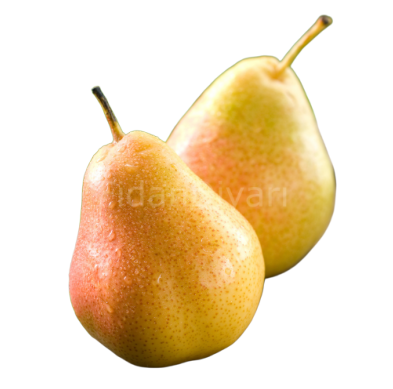

BİLGİ ALMA
BİLGİ ALMA 1
BİLGİ ALMA 2
BİLGİ ALMA 3
BİLGİ ALMA 4
BİLGİ ALMA 5
BİLGİ ALMA 6
BİLGİ ALMA 7
BİLGİ ALMA BAŞARILI
Noneoutput.png
5Noneoutput.png
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([49., 49.], device='cuda:0')
conf: tensor([0.7288, 0.5955], device='cuda:0')
data: tensor([[ 73.0676, 154.2976, 325.2004, 457.6512,   0.7288,  49.0000],
        [196.8533,  58.1298, 416.8500, 345.9253,   0.5955,  49.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (472, 477)
shape: torch.Size([2, 6])
xywh: tensor([[199.1340, 305.9744, 252.1328, 303.3536],
        [306.8516, 202.0276, 219.9967, 287.7954]], device='cuda:0')
xywhn: tensor([[0.4175, 0.6483, 0.5286, 0.6427],
        [0.6433, 0.4280, 0.4612, 0.6097]], device='cuda:0')
xyxy: tensor([[ 73.0676, 154.2976, 325.2004, 457.6512],
        [196.8533,  58.1298, 416.8500, 345.9253]], device='cuda:0')
xyxyn: tensor([[0.1532, 0.3269, 0.6818, 0.9696],
        [0.4127, 0.1232, 0.8739, 0.7329]], device='cuda:

INFO:werkzeug:127.0.0.1 - - [02/Nov/2024 19:40:48] "GET /komut?baslat=ok HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request
from pyngrok import ngrok
from flask_cors import CORS


port_no = 5000

app = Flask(__name__)
CORS(app)
ngrok.set_auth_token("kendi token bilgin")
public_url =  ngrok.connect(port_no).public_url

ref.update({"site": str(public_url)+"/komut?baslat=ok"})

@app.route("/")
def home():
    return f"Running Flask on Google Colab!"

@app.route('/islem', methods=['GET'])
def islem():
    base64_data = request.args.get('base64')  # POST isteğiyle gönderilen veriyi al
    print(base64_data)
    return "gelen veri: {}".format(base64_data)
    # ... diğer işlemler

@app.route('/komut')
def komut():
    deger = request.args.get('baslat')
    print(deger)
    if(deger!=None):


        ref.listen(on_value)  # Remove indentation here
        time.sleep(10)

        #base64 olarak kayıt edilen veriyi çalıştır
        YOLO_islem(Veri.orijinal_goruntu)
        arka_plan_ayirma()

        goruntu_bilgisi_alma()
        print(Veri.orijinal_goruntu)
        print(Veri.yolo_goruntu)
        print(Veri.yolo_goruntu_bilgi)
        print(Veri.arka_plan_ayrilmis)
        #print(Veri.iyilesitirilmis_goruntu)
        print(Veri.goruntu_bilgisi)
        print(Veri.firebase_veri_document_sayisi)
        print(Veri.urunKategori)
        firebase_veri_yukle()
        ref.update({"site": str(public_url)+"/komut?baslat=ok"})


        return 'gorsel işleniyor... {}'.format(deger)
    else:
        return 'merhaba... {}'.format(deger)

print(f"To acces the Gloable link please click {public_url}")

app.run(port=port_no)

In [20]:
print(Veri.orijinal_goruntu)
print(Veri.yolo_goruntu)
print(Veri.yolo_goruntu_bilgi)
print(Veri.arka_plan_ayrilmis)
print(Veri.goruntu_bilgisi)
print(Veri.firebase_veri_document_sayisi)
print(Veri.urunKategori)

Noneoutput.png
11Noneoutput.png
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([74., 74., 74., 74., 74., 74., 74.], device='cuda:0')
conf: tensor([0.6631, 0.6212, 0.6184, 0.5891, 0.5587, 0.4906, 0.3001], device='cuda:0')
data: tensor([[4.0376e+02, 5.7947e+02, 4.5605e+02, 6.2958e+02, 6.6310e-01, 7.4000e+01],
        [4.7230e+02, 5.6109e+02, 5.2398e+02, 6.1214e+02, 6.2122e-01, 7.4000e+01],
        [4.3104e+02, 6.2742e+02, 5.6626e+02, 7.6184e+02, 6.1840e-01, 7.4000e+01],
        [5.3437e+02, 5.8391e+02, 5.8567e+02, 6.3314e+02, 5.8911e-01, 7.4000e+01],
        [3.6563e+02, 6.3248e+02, 4.1564e+02, 6.8352e+02, 5.5866e-01, 7.4000e+01],
        [3.6283e+02, 6.9809e+02, 4.1399e+02, 7.5043e+02, 4.9058e-01, 7.4000e+01],
        [5.7157e+02, 7.0602e+02, 6.2100e+02, 7.5684e+02, 3.0007e-01, 7.4000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1000, 1000)
shape: torch.Size([7, 6])
xywh: tensor([[429.9035, 604.5283,  52.2898,  50.1106],
        [498.1373, 586.616